In [1]:
%install-swiftpm-flags -c release
%install '.package(url: "https://github.com/apple/swift-protobuf.git", from: "1.6.0")' SwiftProtobuf
import SwiftProtobuf

Installing packages:
	.package(url: "https://github.com/apple/swift-protobuf.git", from: "1.6.0")
		SwiftProtobuf
With SwiftPM flags: ['-c', 'release']
Working in: /tmp/tmpqj_urlno/swift-install
Fetching https://github.com/apple/swift-protobuf.git
Cloning https://github.com/apple/swift-protobuf.git
Resolving https://github.com/apple/swift-protobuf.git at 1.7.0
[1/2] Compiling SwiftProtobuf AnyMessageStorage.swift
[2/3] Compiling jupyterInstalledPackages jupyterInstalledPackages.swift
[3/3] Linking libjupyterInstalledPackages.so
Initializing Swift...
Installation complete!


In [2]:
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

('inline', 'module://ipykernel.pylab.backend_inline')


In [3]:
import Python
import TensorFlow

In [4]:
let plt = Python.import("matplotlib.pyplot")

In [5]:
let SAMPLE_SIZE = 100

let a: Float = 2.0
let b: Float = 1.5
let x = Tensor<Float>(rangeFrom: 0, to: 1, stride: 1.0 / Float(SAMPLE_SIZE))
let noise = (Tensor<Float>(randomNormal: [SAMPLE_SIZE]) - 0.5) * 0.1
let y = (a * x + b) + noise

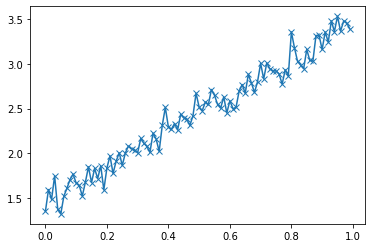

None


In [6]:
plt.clf()
plt.plot(x.makeNumpyArray(), y.makeNumpyArray(), marker: "x")
plt.show()

In [7]:
print(x.shape)
print(y.shape)

[100]
[100]


In [8]:
let X = x.reshaped(toShape: [100, 1]) //SAMPLE_SIZE
let Y = y.reshaped(toShape: [100, 1]) //SAMPLE_SIZE
print(X.shape)
print(Y.shape)

[100, 1]
[100, 1]


In [9]:
struct LinearRegression: Layer {
    var layer1 = Dense<Float>(inputSize: 1, outputSize: 1, activation: identity)
    
    @differentiable
    func callAsFunction(_ input: Tensor<Float>) -> Tensor<Float> {
        return layer1(input)
    }
}


In [10]:
var regression = LinearRegression()
let optimizer = SGD(for: regression, learningRate: 0.03)
Context.local.learningPhase = .training

In [11]:
for _ in 0..<1000 {
    let 𝛁model = regression.gradient { r -> Tensor<Float> in
        let ŷ = r(X)
        let loss = meanSquaredError(predicted: ŷ, expected: Y)
        print("Loss: \(loss)")
        return loss
    }
    optimizer.update(&regression, along: 𝛁model)
}

Loss: 4.4418945
Loss: 3.7980282
Loss: 3.2479882
Loss: 2.7781
Loss: 2.376682
Loss: 2.033755
Loss: 1.7407947
Loss: 1.4905182
Loss: 1.2767056
Loss: 1.094042
Loss: 0.9379877
Loss: 0.8046646
Loss: 0.6907602
Loss: 0.5934443
Loss: 0.5102992
Loss: 0.43925983
Loss: 0.37856185
Loss: 0.3266982
Loss: 0.28238142
Loss: 0.24451156
Loss: 0.2121494
Loss: 0.18449205
Loss: 0.16085407
Loss: 0.14064962
Loss: 0.12337847
Loss: 0.10861314
Loss: 0.095988505
Loss: 0.08519268
Loss: 0.07595926
Loss: 0.06806057
Loss: 0.061302166
Loss: 0.055517968
Loss: 0.050566062
Loss: 0.046325255
Loss: 0.04269195
Loss: 0.039577708
Loss: 0.036906987
Loss: 0.0346152
Loss: 0.032647204
Loss: 0.030955901
Loss: 0.029501032
Loss: 0.028248224
Loss: 0.027168106
Loss: 0.02623559
Loss: 0.025429243
Loss: 0.024730735
Loss: 0.024124451
Loss: 0.023597004
Loss: 0.023136992
Loss: 0.022734666
Loss: 0.022381673
Loss: 0.022070913
Loss: 0.021796303
Loss: 0.021552647
Loss: 0.02133549
Loss: 0.021141052
Loss: 0.020966105
Loss: 0.020807862
Loss: 0.02066

Loss: 0.012493598
Loss: 0.012492159
Loss: 0.012490737
Loss: 0.012489324
Loss: 0.012487922
Loss: 0.012486534
Loss: 0.012485152
Loss: 0.012483784
Loss: 0.012482427
Loss: 0.012481079
Loss: 0.012479741
Loss: 0.01247842
Loss: 0.012477099
Loss: 0.012475796
Loss: 0.012474502
Loss: 0.012473221
Loss: 0.012471941
Loss: 0.012470677
Loss: 0.012469424
Loss: 0.012468178
Loss: 0.012466943
Loss: 0.012465719
Loss: 0.012464507
Loss: 0.012463298
Loss: 0.0124621065
Loss: 0.012460918
Loss: 0.012459739
Loss: 0.012458572
Loss: 0.0124574145
Loss: 0.012456267
Loss: 0.012455124
Loss: 0.012453991
Loss: 0.012452873
Loss: 0.012451756
Loss: 0.012450654
Loss: 0.01244956
Loss: 0.012448471
Loss: 0.012447393
Loss: 0.01244632
Loss: 0.012445262
Loss: 0.012444207
Loss: 0.012443161
Loss: 0.012442125
Loss: 0.012441096
Loss: 0.012440077
Loss: 0.012439067
Loss: 0.012438062
Loss: 0.012437061
Loss: 0.012436073
Loss: 0.012435095
Loss: 0.01243412
Loss: 0.012433157
Loss: 0.012432197
Loss: 0.01243125
Loss: 0.012430306
Loss: 0.01242

In [12]:
let weight = Float(regression.layer1.weight[0][0])!
let bias = Float(regression.layer1.bias[0])!
print(weight, bias)

1.9970441 1.4530461


In [13]:
Context.local.learningPhase = .inference
let score = regression(X)
let y2 = score.reshaped(toShape: [100])

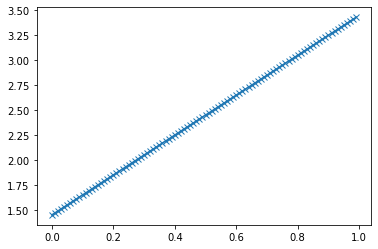

None


In [14]:
plt.clf()
plt.plot(x.makeNumpyArray(), y2.makeNumpyArray(), marker: "x")
plt.show()

In [15]:
%include "./CoreMLProto/ArrayFeatureExtractor.pb.swift"

: 

In [ ]:
%include "./CoreMLProto/BayesianProbitRegressor.pb.swift"

In [ ]:
%include "./CoreMLProto/DataStructures.pb.swift"

In [ ]:
%include "./CoreMLProto/CategoricalMapping.pb.swift"

In [ ]:
%include "./CoreMLProto/CustomModel.pb.swift"

In [ ]:
%include "./CoreMLProto/DictVectorizer.pb.swift"

In [ ]:
%include "./CoreMLProto/FeatureTypes.pb.swift"

In [ ]:
%include "./CoreMLProto/FeatureVectorizer.pb.swift"

In [ ]:
%include "./CoreMLProto/GLMClassifier.pb.swift"

In [ ]:
%include "./CoreMLProto/GLMRegressor.pb.swift"

In [ ]:
%include "./CoreMLProto/Gazetteer.pb.swift"

In [ ]:
%include "./CoreMLProto/Identity.pb.swift"

In [ ]:
%include "./CoreMLProto/Imputer.pb.swift"

In [ ]:
%include "./CoreMLProto/Scaler.pb.swift"

In [ ]:
%include "./CoreMLProto/ItemSimilarityRecommender.pb.swift"

In [ ]:
%include "./CoreMLProto/Parameters.pb.swift"

In [ ]:
%include "./CoreMLProto/Normalizer.pb.swift"

In [ ]:
%include "./CoreMLProto/LinkedModel.pb.swift"

In [ ]:
%include "./CoreMLProto/NearestNeighbors.pb.swift"

In [ ]:
%include "./CoreMLProto/NonMaximumSuppression.pb.swift"

In [ ]:
%include "./CoreMLProto/OneHotEncoder.pb.swift"

In [ ]:
%include "./CoreMLProto/SVM.pb.swift"

In [ ]:
%include "./CoreMLProto/SoundAnalysisPreprocessing.pb.swift"

In [ ]:
%include "./CoreMLProto/TextClassifier.pb.swift"

In [ ]:
%include "./CoreMLProto/TreeEnsemble.pb.swift"

In [ ]:
%include "./CoreMLProto/VisionFeaturePrint.pb.swift"

In [ ]:
%include "./CoreMLProto/WordEmbedding.pb.swift"

In [ ]:
%include "./CoreMLProto/WordTagger.pb.swift"

In [ ]:
%include "./CoreMLProto/NeuralNetwork.pb.swift"

In [ ]:
%include "./CoreMLProto/Model.pb.swift"

In [16]:
let coreModel = CoreML_Specification_Model.with {
    $0.specificationVersion = 4
    $0.description_p = CoreML_Specification_ModelDescription.with {
        $0.input = [CoreML_Specification_FeatureDescription.with {
            $0.name = "dense_input"
            $0.type = CoreML_Specification_FeatureType.with {
                $0.multiArrayType = CoreML_Specification_ArrayFeatureType.with {
                    $0.shape = [1]
                    $0.dataType = CoreML_Specification_ArrayFeatureType.ArrayDataType.double
                }
            }
        }]
        $0.output = [CoreML_Specification_FeatureDescription.with {
            $0.name = "output"
            $0.type = CoreML_Specification_FeatureType.with {
                $0.multiArrayType = CoreML_Specification_ArrayFeatureType.with {
                    $0.shape = [1]
                    $0.dataType = CoreML_Specification_ArrayFeatureType.ArrayDataType.double
                }
            }
        }]
        $0.trainingInput = [CoreML_Specification_FeatureDescription.with {
            $0.name = "dense_input"
            $0.type = CoreML_Specification_FeatureType.with {
                $0.multiArrayType = CoreML_Specification_ArrayFeatureType.with {
                    $0.shape = [1]
                    $0.dataType = CoreML_Specification_ArrayFeatureType.ArrayDataType.double
                }
            }
        }, {
            $0.name = "output_true"
            $0.type = CoreML_Specification_FeatureType.with {
                $0.multiArrayType = CoreML_Specification_ArrayFeatureType.with {
                    $0.shape = [1]
                    $0.dataType = CoreML_Specification_ArrayFeatureType.ArrayDataType.double
                }
            }

        }]
        $0.metadata = CoreML_Specification_Metadata.with {
            $0.shortDescription = "Trivial linear classifier"
            $0.author = "Jacopo Mangiavacchi"
            $0.license = "MIT"
            $0.userDefined = ["coremltoolsVersion" : "3.1"]
        }
    }
    $0.isUpdatable = true
    $0.neuralNetwork = CoreML_Specification_NeuralNetwork.with {
        $0.layers = [CoreML_Specification_NeuralNetworkLayer.with {
            $0.name = "dense_1"
            $0.input = ["dense_input"]
            $0.output = ["output"]
            $0.isUpdatable = true
            $0.innerProduct = CoreML_Specification_InnerProductLayerParams.with {
                $0.inputChannels = 1
                $0.outputChannels = 1
                $0.hasBias_p = true
                $0.weights = CoreML_Specification_WeightParams.with {
                    $0.floatValue = [weight]
                    $0.isUpdatable = true
                }
                $0.bias = CoreML_Specification_WeightParams.with {
                    $0.floatValue = [bias]
                    $0.isUpdatable = true
                }
            }
        }]
        $0.updateParams = CoreML_Specification_NetworkUpdateParameters.with {
            $0.lossLayers = CoreML_Specification_LossLayer.with {
                $0.name = "lossLayer"
                $0.meanSquaredErrorLossLayer = CoreML_Specification_MeanSquaredErrorLossLayer.with {
                    $0.input = "output"
                    $0.target = "output_true"
                }
            }
            $0.optimizer = CoreML_Specification_Optimizer.with {
                $0.sgdOptimizer = CoreML_Specification_SGDOptimizer.with {
                    $0.learningRate = 
                    $0.miniBatchSize = 
                    $0.momentum = 
                }
            }
            $0.epochs = CoreML_Specification_
            $0.shuffle = CoreML_Specification_
        }
    }
}


: 

In [ ]:
let binaryModelData: Data = try coreModel.serializedData()

In [ ]:
binaryModelData.write(to: URL(fileURLWithPath: "./s4tf_model_personalization.mlmodel"))